#### 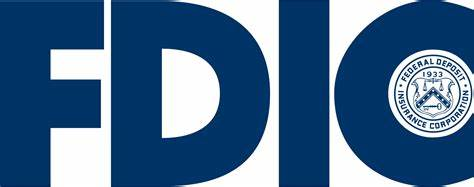

<b> FDIC</b> stands for Federal Deposit Insurance Corporation.

Being a United States (independent) government agency which oversees the banking industry, it was established in 1933.<p>
The Federal Deposit Insurance Corporation (FDIC) is a United States government corporation providing deposit insurance to depositors in U.S. commercial banks and savings institutions.

#### Few FACTS 

- The <b>FDIC</b> was created in 1933 in response to the banking crisis of the Great Depression.
- The <b>FDIC</b> insures deposits up to 250,000 per depositor per insured bank.
- The <b>FDIC</b> is an independent agency of the federal government, but it is funded by premiums paid by the banks and 
savings institutions it insures.
- The <b>FDIC</b> has the power to take over and liquidate failed banks and savings institutions, and it also has the 
authority to borrow money from the U.S. Treasury if necessary to carry out its functions.
- As of December 31, 2021, the FDIC insured deposits at 4,725 FDIC-insured institutions with total assets of 22.2 trillion.
- The <b>FDIC</b> maintains a list of failed banks and savings institutions on its website, dating back to 1934.


Then in March 2023, Silicon Valley Bank's, SVB, happened. <p>
SVB collapsed due to a sudden bank run and capital crisis, according to media. It was taken over by federal regulators and was said to be the largest failure of a US bank since Washington Mutual in 2008. 

While the data here as at when sourced from the <b>FDIC</b> website did not include SVB data, these rather few analyses (not an all-inclusive one) attempt to see a few things which can be seen, like trends and patterns... knowing fully well that a lot happen behind the scenes which data might not have captured.

#### The data source is from the FDIC website, and publicly available.


#### import libraries

In [1]:
import pandas as pd
import numpy as np
import requests
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

#### retrieve the dataset from the url


In [2]:
url = 'https://pfabankapi.app.cloud.gov/api/failures?fields=NAME%2CCERT%2CFIN%2CCITYST%2CFAILDATE%2CSAVR%2CRESTYPE%2CCOST%2CRESTYPE1%2CCHCLASS1%2CQBFDEP%2CQBFASSET&filters=FAILYR%3A%5B1934%20TO%202023%5D&limit=10000&react=true&sort_by=FAILDATE&sort_order=desc&subtotal_by=RESTYPE&total_fields=QBFDEP%2CQBFASSET%2CCOST&format=csv&download=true&filename=bank-data'
response = requests.get(url)

with open('data.csv', 'wb') as f:
    f.write(response.content)

In [3]:
# check first 5 rows
data = pd.read_csv('data.csv')
data.head()

,CERT,CHCLASS1,CITYST,COST,FAILDATE,FIN,ID,NAME,QBFASSET,QBFDEP,RESTYPE,RESTYPE1,SAVR
0,15426.0,NM,"ALMENA, KS",16806.0,10/23/2020,10538,4104,ALMENA STATE BANK,65733.0,64941.0,FAILURE,PA,DIF
1,16748.0,NM,"FORT WALTON BEACH, FL",7247.0,10/16/2020,10537,4103,FIRST CITY BANK OF FLORIDA,136566.0,133936.0,FAILURE,PA,DIF
2,14361.0,NM,"BARBOURSVILLE, WV",45913.0,4/3/2020,10536,4102,THE FIRST STATE BANK,151808.0,143102.0,FAILURE,PA,DIF
3,18265.0,NM,"ERICSON, NE",25293.0,2/14/2020,10535,4101,ERICSON STATE BANK,100879.0,95159.0,FAILURE,PA,DIF
4,21111.0,N,"NEWARK, NJ",1946.0,11/1/2019,10534,4100,CITY NATIONAL BANK OF NEW JERSEY,120574.0,111234.0,FAILURE,PA,DIF


In [4]:
# retrieve data columns
data.columns

Index(['CERT', 'CHCLASS1', 'CITYST', 'COST', 'FAILDATE', 'FIN', 'ID', 'NAME',
       'QBFASSET', 'QBFDEP', 'RESTYPE', 'RESTYPE1', 'SAVR'],
      dtype='object')

In [5]:
# rename the column names to be more descriptive
new_columns = ['Cert', 'CharterClass', 'Location', 'EstimatedLoss', 'EffectiveDate', 'FinInstitution#', 
               'ID', 'InstitutionName', 'TotalAssets', 'TotalDeposits', 'Resolution', 'TransactionType', 'InsuranceFund']
data.columns = new_columns
print(data.columns)

Index(['Cert', 'CharterClass', 'Location', 'EstimatedLoss', 'EffectiveDate',
       'FinInstitution#', 'ID', 'InstitutionName', 'TotalAssets',
       'TotalDeposits', 'Resolution', 'TransactionType', 'InsuranceFund'],
      dtype='object')


In [6]:
# check data types and more
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4104 entries, 0 to 4103
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Cert             3616 non-null   float64
 1   CharterClass     4104 non-null   object 
 2   Location         4104 non-null   object 
 3   EstimatedLoss    3466 non-null   float64
 4   EffectiveDate    4104 non-null   object 
 5   FinInstitution#  4104 non-null   int64  
 6   ID               4104 non-null   int64  
 7   InstitutionName  4104 non-null   object 
 8   TotalAssets      3950 non-null   float64
 9   TotalDeposits    4102 non-null   float64
 10  Resolution       4104 non-null   object 
 11  TransactionType  4104 non-null   object 
 12  InsuranceFund    4104 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 416.9+ KB


In [7]:
# change the data types of a few columns
dtypes = {'Cert': 'object', 'EffectiveDate': 'datetime64', 'FinInstitution#': 'object'}
data[['Cert', 'EffectiveDate', 'FinInstitution#']] = data[['Cert', 'EffectiveDate', 'FinInstitution#']].astype(dtypes)

In [8]:
data.tail()

,Cert,CharterClass,Location,EstimatedLoss,EffectiveDate,FinInstitution#,ID,InstitutionName,TotalAssets,TotalDeposits,Resolution,TransactionType,InsuranceFund
4099,NaN,NM,"LEWISPORT, KY",NaN,1934-08-06,0,137,BANK OF LEWISPORT,81.0,68.0,FAILURE,PO,BIF
4100,NaN,N,"LIMA, MT",NaN,1934-07-18,0,135,FIRST NATIONAL BANK OF LIMA,91.0,42.0,FAILURE,PO,BIF
4101,NaN,NM,"FLORENCE, IN",NaN,1934-07-18,0,136,FLORENCE DEPOSIT BANK,105.0,69.0,FAILURE,PO,BIF
4102,NaN,NM,"EAST PEORIA, IL",NaN,1934-05-28,0,133,FON DU LAC STATE BANK,374.0,238.0,FAILURE,PO,BIF
4103,NaN,NM,"PITTSBURGH, PA",NaN,1934-04-19,0,134,BANK OF AMERICA TRUST CO.,1435.0,1064.0,FAILURE,PO,BIF


In [9]:
# rows and columns length
data.shape

(4104, 13)

In [10]:
# location column
data['Location'].head(10)

0               ALMENA, KS
1    FORT WALTON BEACH, FL
2        BARBOURSVILLE, WV
3              ERICSON, NE
4               NEWARK, NJ
5               LOUISA, KY
6               MAUMEE, OH
7               COOPER, TX
8              CHICAGO, IL
9              ARGONIA, KS
Name: Location, dtype: object

In [11]:
# split Location column into Location and State columns
data[['Location', 'State']] = data['Location'].str.rsplit(',' , n=1 , expand=True)

In [12]:
data.head(4)

,Cert,CharterClass,Location,EstimatedLoss,EffectiveDate,FinInstitution#,ID,InstitutionName,TotalAssets,TotalDeposits,Resolution,TransactionType,InsuranceFund,State
0,15426,NM,ALMENA,16806.0,2020-10-23,10538,4104,ALMENA STATE BANK,65733.0,64941.0,FAILURE,PA,DIF,KS
1,16748,NM,FORT WALTON BEACH,7247.0,2020-10-16,10537,4103,FIRST CITY BANK OF FLORIDA,136566.0,133936.0,FAILURE,PA,DIF,FL
2,14361,NM,BARBOURSVILLE,45913.0,2020-04-03,10536,4102,THE FIRST STATE BANK,151808.0,143102.0,FAILURE,PA,DIF,WV
3,18265,NM,ERICSON,25293.0,2020-02-14,10535,4101,ERICSON STATE BANK,100879.0,95159.0,FAILURE,PA,DIF,NE


In [13]:
data['Resolution'].value_counts()

FAILURE       3525
ASSISTANCE     579
Name: Resolution, dtype: int64

#### `

### Exploratory Data Analysis

#### ratio of banks resolution (failure to assistance) 

In [14]:
assistance_to_failure_ratio = len(data[data['Resolution']== 'ASSISTANCE'])/len(data[data['Resolution']== 'FAILURE'])

print("The ratio of bank's ASSISTANCE to FAILURE:", round(assistance_to_failure_ratio,1))

The ratio of bank's ASSISTANCE to FAILURE: 0.2


### `

#### earliest and most recent date of bank failure

In [15]:
print('The earliest date of bank failure: ', data[data['Resolution'] == 'FAILURE']['EffectiveDate'].min().date())
print('\n')
print('Bank record: ')
data[(data['Resolution'] == 'FAILURE') & (data['EffectiveDate'] == data['EffectiveDate'].min())]

The earliest date of bank failure:  1934-04-19


Bank record: 


,Cert,CharterClass,Location,EstimatedLoss,EffectiveDate,FinInstitution#,ID,InstitutionName,TotalAssets,TotalDeposits,Resolution,TransactionType,InsuranceFund,State
4103,NaN,NM,PITTSBURGH,NaN,1934-04-19,0,134,BANK OF AMERICA TRUST CO.,1435.0,1064.0,FAILURE,PO,BIF,PA


### .

In [16]:
print("The most recent date of bank failure preceding Silicon Valley Bank's: ",
      data[data['Resolution'] == 'FAILURE']['EffectiveDate'].max().date())
print('\n')

print('Bank record: ')
data[(data['Resolution'] == 'FAILURE') & (data['EffectiveDate'] == data['EffectiveDate'].max())]

The most recent date of bank failure preceding Silicon Valley Bank's:  2020-10-23


Bank record: 


,Cert,CharterClass,Location,EstimatedLoss,EffectiveDate,FinInstitution#,ID,InstitutionName,TotalAssets,TotalDeposits,Resolution,TransactionType,InsuranceFund,State
0,15426,NM,ALMENA,16806.0,2020-10-23,10538,4104,ALMENA STATE BANK,65733.0,64941.0,FAILURE,PA,DIF,KS


#### .

#### year and decade with the most bank failures

In [17]:
count_of_year = data[data['Resolution']=='FAILURE'].groupby(data['EffectiveDate'].dt.year)['Resolution'].count()
max_count_year = count_of_year.sort_values(ascending=False).idxmax()
max_count = count_of_year.loc[max_count_year]

print('Year with most bank failures:', max_count_year)
print('Total count of bank failures in', max_count_year, ':', max_count)

Year with most bank failures: 1989
Total count of bank failures in 1989 : 531


In [18]:
decade_count = data[data['Resolution']=='FAILURE'].groupby((data['EffectiveDate'].dt.year // 10)* 10) ['Resolution'].count()
max_decade_count = decade_count.sort_values(ascending=False).idxmax()

sum_of_max_decade_count = decade_count.loc[max_decade_count]

print('The decade with most bank failures:', max_decade_count,"'s")
print('Total bank failures in the decade:', sum_of_max_decade_count)

The decade with most bank failures: 1980 's
Total bank failures in the decade: 1467


### `

#### 10 states with highest concentrations of bank failures over the years

In [19]:
# Ranks of state with most bank failures
highest_10_states = data[data['Resolution'] == 'FAILURE'].groupby('State')['Resolution'].count()
rank_of_highest_10_states = highest_10_states.sort_values().nlargest(n=10)

print('First 10 States with highest bank failures: \n', rank_of_highest_10_states)

First 10 States with highest bank failures: 
 State
 TX    737
 CA    238
 IL    183
 FL    179
 OK    170
 LA    142
 GA    128
 MO    122
 KS    112
 CO     98
Name: Resolution, dtype: int64


### `

#### The maximum Estimated Loss

In [20]:
print('Estimated Loss recorded:', data['EstimatedLoss'].max())
data[data['EstimatedLoss'] == data['EstimatedLoss'].max()]

Estimated Loss recorded: 12040084.0


,Cert,CharterClass,Location,EstimatedLoss,EffectiveDate,FinInstitution#,ID,InstitutionName,TotalAssets,TotalDeposits,Resolution,TransactionType,InsuranceFund,State
544,29730,SL,PASADENA,12040084.0,2008-07-11,10007,3560,INDYMAC BANK F.S.B,30698512.0,18941727.0,FAILURE,PI,DIF,CA


In [21]:
# Some banks Estimated Loss figures were not supplied
print('Total # of banks with unknown/unrecorded Estimated Loss:', data['EstimatedLoss'].isna().sum())

Total # of banks with unknown/unrecorded Estimated Loss: 638


#### `

#### Banks: Did some banks appear more than once (using combination of InstitutionName + Location + State)?

In [22]:
# select the columns of interest
banks = data[['InstitutionName', 'Location', 'State']]

# find duplicated rows based on both columns
duplicated_banks = banks[banks.duplicated(keep=False)]

# sort by bank name and state
duplicated_banks = duplicated_banks.sort_values(by=['InstitutionName', 'Location', 'State'])

duplicated_banks

,InstitutionName,Location,State
336,AMERICAN NATIONAL BANK,PARMA,OH
2477,AMERICAN NATIONAL BANK,PARMA,OH
2966,BOHEMIAN S&LA,ST. LOUIS,MO
3268,BOHEMIAN S&LA,ST. LOUIS,MO
1066,CROSSROADS BANK,VICTORIA,TX
2540,CROSSROADS BANK,VICTORIA,TX
715,"FIRST CITY, TEXAS - ARANSAS PASS",ARANSAS PASS,TX
2407,"FIRST CITY, TEXAS - ARANSAS PASS",ARANSAS PASS,TX
709,"FIRST CITY, TEXAS - HOUSTON, NA",HOUSTON,TX
2388,"FIRST CITY, TEXAS - HOUSTON, NA",HOUSTON,TX


In [23]:
## the term "duplicated' here is a misnomer; it does not mean duplicated records, rather but banks which appear more than -
## once as a result of being "assisted" and then "failing", later...

In [24]:
duplicated_rows = data[data.duplicated
                       (subset=['InstitutionName', 'Location','State'], keep=False)].sort_values(['InstitutionName', 
                                                                                                  'State','EffectiveDate'])
result = duplicated_rows[['InstitutionName', 'Location', 'State', 'Resolution', 'EffectiveDate']]
result.reset_index(drop=True)

,InstitutionName,Location,State,Resolution,EffectiveDate
0,AMERICAN NATIONAL BANK,PARMA,OH,ASSISTANCE,1988-02-12
1,AMERICAN NATIONAL BANK,PARMA,OH,FAILURE,2010-03-19
2,BOHEMIAN S&LA,ST. LOUIS,MO,ASSISTANCE,1983-12-01
3,BOHEMIAN S&LA,ST. LOUIS,MO,FAILURE,1986-01-30
4,CROSSROADS BANK,VICTORIA,TX,ASSISTANCE,1987-12-03
5,CROSSROADS BANK,VICTORIA,TX,FAILURE,1991-03-14
6,"FIRST CITY, TEXAS - ARANSAS PASS",ARANSAS PASS,TX,ASSISTANCE,1988-04-20
7,"FIRST CITY, TEXAS - ARANSAS PASS",ARANSAS PASS,TX,FAILURE,1992-10-30
8,"FIRST CITY, TEXAS - HOUSTON, NA",HOUSTON,TX,ASSISTANCE,1988-04-20
9,"FIRST CITY, TEXAS - HOUSTON, NA",HOUSTON,TX,FAILURE,1992-10-30


In [25]:
# Most banks still failed, after being assisted once or more, in the order of ASSISTANCE, THEN FAILURE (as the date shows)

#### `

#### bank failure trend

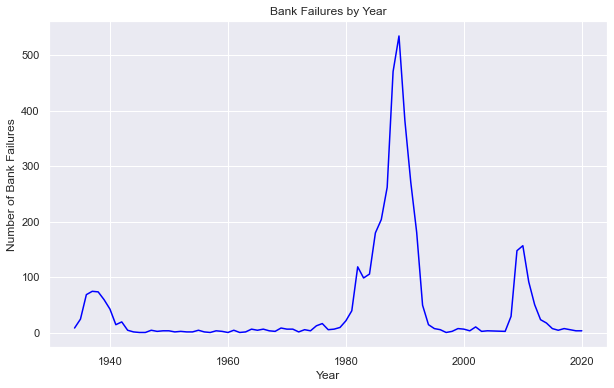

In [27]:
# Group data by year and count the number of bank failures
bank_failures_by_year = data.groupby(data['EffectiveDate'].dt.year)['InstitutionName'].count()

# Create a line plot of bank failures over time using seaborn
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(10,6)})
sns.lineplot(x=bank_failures_by_year.index, y=bank_failures_by_year.values, color='blue')
plt.xlabel('Year')
plt.ylabel('Number of Bank Failures')
plt.title('Bank Failures by Year')
plt.show()

#### `

#### Transaction Category: Which Transaction_type has more FAILURE or otherwise?

In [28]:
# distinct TransactionType seen in the data
data['TransactionType'].unique()

array(['PA', 'PI', 'PO', 'DINB', 'OBAM', 'IDT', 'A/A', 'REP', 'ABT',
       'MGR', 'P&A'], dtype=object)

In [29]:
pd.crosstab(data['TransactionType'], data['Resolution']).sort_values(by='FAILURE', ascending=False)

Resolution,ASSISTANCE,FAILURE
TransactionType,,
PA,0,2097
PO,0,573
IDT,0,386
P&A,0,251
PI,0,140
MGR,0,37
ABT,0,16
OBAM,0,13
DINB,0,9


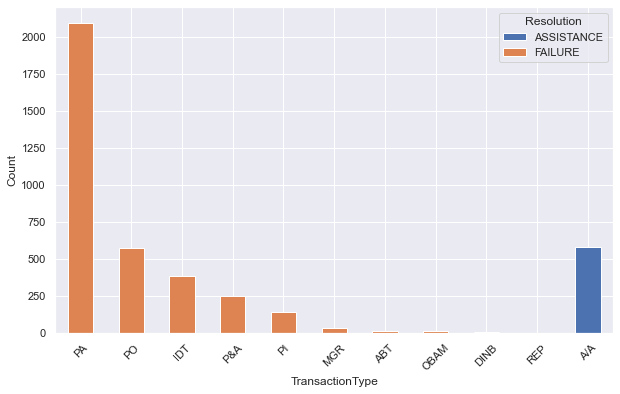

In [30]:
transaction_type = pd.crosstab(data['TransactionType'], data['Resolution'])
transaction_type.sort_values(by='FAILURE', ascending=False).plot(kind='bar', stacked=True)
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

##### "A/A" actually means Assistance Transaction, being one of the Resolution types

#### `

####  CharterClass breakdown with respect to Resolution type (FAILURE or ASSISTANCE)

In [31]:
data['CharterClass'].unique()

array(['NM', 'N', 'SB', 'SM', 'SI', 'SL', 'MI'], dtype=object)

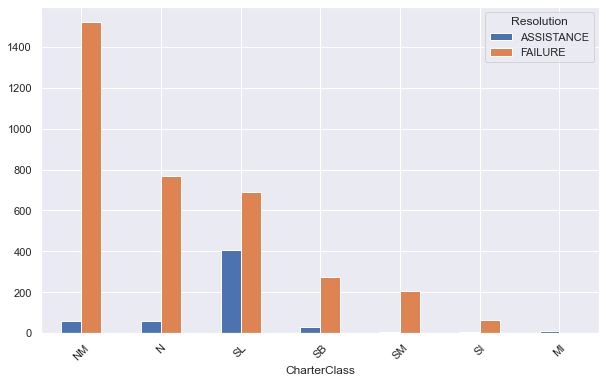

In [32]:
# create crosstab and sort by count of FAILURE
transaction_type = pd.crosstab(data['CharterClass'], data['Resolution'])
transaction_type = transaction_type.sort_values(by='FAILURE', ascending=False)

# plot the bar chart with the original order
transaction_type.plot(kind='bar', stacked=False)
plt.xticks(rotation=45)
plt.show()

In [33]:
pd.crosstab(data['CharterClass'], data['Resolution']).sort_values(by='FAILURE', ascending=False)

Resolution,ASSISTANCE,FAILURE
CharterClass,,
NM,61,1521
N,58,770
SL,408,689
SB,30,273
SM,6,205
SI,4,65
MI,12,2


#### `

#### Correlation between Estimated Loss and Total Assets

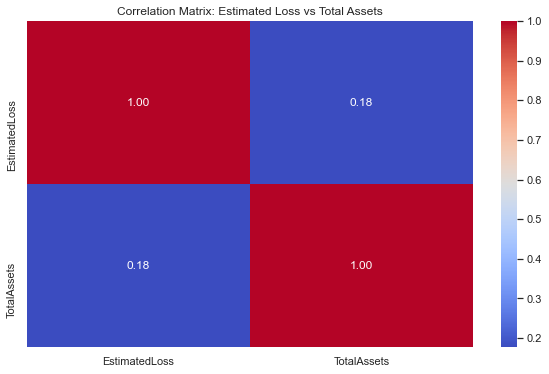

In [34]:
# Filter out rows where EstimatedLoss or TotalAssets are missing
data_ = data.dropna(subset=['EstimatedLoss', 'TotalAssets'])

# Compute the correlation matrix
corr = data_[['EstimatedLoss', 'TotalAssets']].corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Matrix: Estimated Loss vs Total Assets')
plt.show()

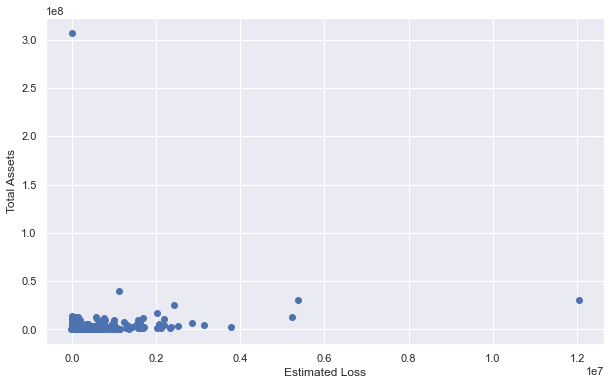

Correlation coefficient: 0.17682026910049475


In [35]:
# Select only the rows with non-missing EstimatedLoss and TotalAssets values
selected_data = data[['EstimatedLoss', 'TotalAssets']].dropna()

# Create a scatter plot of EstimatedLoss vs TotalAssets
plt.scatter(selected_data['EstimatedLoss'], selected_data['TotalAssets'])
plt.xlabel('Estimated Loss')
plt.ylabel('Total Assets')
plt.show()

# Calculate the correlation coefficient
correlation = np.corrcoef(selected_data['EstimatedLoss'], selected_data['TotalAssets'])[0, 1]
print('Correlation coefficient:', correlation)

#### `

##### Data exploration here is "as is" or as got from the data source; 
##### it is highly subjected to right interpretations from financial standpoints and by economic and/or financial analysts

#####  https://www.linkedin.com/in/dare-johnson/